# Assignment - What's the Weather Like?

## Background

Whether financial, political, or social -- data's true power lies in its ability to answer questions definitively. So let's take what you've learned about Python requests, APIs, and JSON traversals to answer a fundamental question: "What's the weather like as we approach the equator?"

Now, we know what you may be thinking: _"Duh. It gets hotter..."_

But, if pressed, how would you **provide evidence**?

## WeatherPy

In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a [simple Python library](https://pypi.python.org/pypi/citipy), the [OpenWeatherMap API](https://openweathermap.org/api), and a little common sense to create a representative model of weather across world cities.

Your objective is to build a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

Your final notebook must:

* Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
* Perform a weather check on each of the cities using a series of successive API calls.
* OPTIONAL: Include a print log of each city as it's being processed with the city number and city name.
* OPTIONAL: Save both a CSV of all data retrieved and png images for each scatter plot.

As final considerations:

* You must complete your analysis using a Jupyter notebook.
* You must use the Matplotlib ,Seaborn or Pandas plotting libraries.
* You must include a written description of three observable trends based on the data.
* You must use proper labeling of your plots, including aspects like: Plot Titles (with date of analysis) and Axes Labels.

## Hints and Considerations

* The city data is generated based on random coordinates; as such, your outputs will not be an exact match to the provided starter notebook.

* You may want to start this assignment by refreshing yourself on the [geographic coordinate system](http://desktop.arcgis.com/en/arcmap/10.3/guide-books/map-projections/about-geographic-coordinate-systems.htm).

* Next, spend the requisite time necessary to study the OpenWeatherMap API. Based on your initial study, you should be able to answer  basic questions about the API: Where do you request the API key? Which Weather API in particular will you need? What URL endpoints does it expect? What JSON structure does it respond with? Before you write a line of code, you should be aiming to have a crystal clear understanding of your intended outcome.

* A starter code for Citipy has been provided. However, if you're craving an extra challenge, push yourself to learn how it works: [citipy Python library](https://pypi.python.org/pypi/citipy). 

* Lastly, remember -- this is a challenging activity. Push yourself! If you complete this task, then you can safely say that you've gained a strong mastery of the core foundations of data analytics and it will only go better from here. Good luck!
#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [19]:
import pip
pip.main(["install", "citipy"])
import citipy

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


  Using cached citipy-0.0.5.tar.gz (557 kB)
  Using cached kdtree-0.16-py2.py3-none-any.whl (7.7 kB)
  Created wheel for citipy: filename=citipy-0.0.5-py3-none-any.whl size=559704 sha256=7d9ae67d147bec641ca615751daeb76110f22bd385992022e7ee61026fe1c01f
  Stored in directory: c:\users\weird\appdata\local\pip\cache\wheels\6d\df\5e\ad8eb9cc5ee7f4ba76865167c09f9a7edff405c669111d8353
Successfully built citipy


In [201]:
# Don't modify this cell.
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import time
from pprint import pprint

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [151]:
# Don't modify this cell
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

A lot of starter code has been generated for you. Use the cell below to play with the data to ensure you know what's happening. 

In [254]:
cities

['rawson',
 'topolovgrad',
 'rikitea',
 'yellowknife',
 'tuktoyaktuk',
 'hobart',
 'tuatapere',
 'bandar',
 'codrington',
 'hambantota',
 'thompson',
 'klaksvik',
 'barrow',
 'chokurdakh',
 'necochea',
 'illoqqortoormiut',
 'konstantinovka',
 'bengkulu',
 'saint-philippe',
 'henties bay',
 'ushuaia',
 'ijaki',
 'yerbogachen',
 'ancud',
 'biak',
 'anori',
 'lebu',
 'sao filipe',
 'dikson',
 'nizhneyansk',
 'attawapiskat',
 'vaitupu',
 'phan thiet',
 'skjervoy',
 'mataura',
 'kalmunai',
 'port alfred',
 'kavieng',
 'ribeira grande',
 'road town',
 'shelburne',
 'lompoc',
 'tasiilaq',
 'chagda',
 'gusinoye ozero',
 'octeville',
 'vizinga',
 'saint george',
 'arraial do cabo',
 'chuy',
 'punta arenas',
 'cape town',
 'roald',
 'tsihombe',
 'cidreira',
 'porto novo',
 'albany',
 'batsfjord',
 'erzin',
 'mao',
 'etchoropo',
 'zaysan',
 'mana',
 'new norfolk',
 'burnie',
 'saleaula',
 'whitehorse',
 'santa isabel',
 'carnarvon',
 'hualmay',
 'dunedin',
 'wanaka',
 'rio gallegos',
 'jamestown'

### Perform API Calls
* Perform a weather check on each city in `cities` using a series of successive API calls.
* OPTIONAL: Include a print log of each city as it'sbeing processed (with the city number and city name).


In [186]:

# OpenWeatherMap API Key
api_key = api_keys.api_key

# base url for getting api data
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

# example request
req = requests.get(base_url + f'&q={cities[0]}').json()

# Your code here. A loop maybe? 
#NOTE: API calls can be slow. They can also be limited. Once you have a list try not to rerun all API calls very often. 

#create list to hold weather data
weather_data = []
 
#loop through cities list to update weather data list. 
for x in cities:
    req = requests.get(base_url + f'&q={x}').json()
    weather_data.append(req)
#I'd love to do the optional portion but just ran out of time to figure it out. 
   
weather_data

[{'coord': {'lon': -65.1023, 'lat': -43.3002},
  'weather': [{'id': 804,
    'main': 'Clouds',
    'description': 'overcast clouds',
    'icon': '04n'}],
  'base': 'stations',
  'main': {'temp': 67.12,
   'feels_like': 67.48,
   'temp_min': 67.12,
   'temp_max': 67.12,
   'pressure': 1008,
   'humidity': 84,
   'sea_level': 1008,
   'grnd_level': 1006},
  'visibility': 10000,
  'wind': {'speed': 10.98, 'deg': 355, 'gust': 16.33},
  'clouds': {'all': 100},
  'dt': 1617755245,
  'sys': {'country': 'AR', 'sunrise': 1617705777, 'sunset': 1617746527},
  'timezone': -10800,
  'id': 3839307,
  'name': 'Rawson',
  'cod': 200},
 {'coord': {'lon': 26.3333, 'lat': 42.0833},
  'weather': [{'id': 804,
    'main': 'Clouds',
    'description': 'overcast clouds',
    'icon': '04n'}],
  'base': 'stations',
  'main': {'temp': 49.17,
   'feels_like': 47.5,
   'temp_min': 46.99,
   'temp_max': 51.8,
   'pressure': 1000,
   'humidity': 93},
  'visibility': 8000,
  'wind': {'speed': 4.61, 'deg': 260},
  'cl

In [189]:
len(weather_data)

615

In [255]:
#create a dictionary to hold the new weather data 
weather_dict = {'City':[],'Cloudiness': [], 'Country': [], 'Date': [], 'Humidity': [],  'Lat': [],  'Long': [], 'Max Temp': [], 
             'Wind Speed': []}
             
#loop through weather_data list to put everything where it belongs in the dictionary. 
for x in weather_data:
    if x['cod'] == 200:
        weather_dict['City'].append(x['name'])
        weather_dict['Cloudiness'].append(x['clouds']['all'])
        weather_dict['Country'].append(x['sys']['country'])
        weather_dict['Date'].append(x['dt'])
        weather_dict['Humidity'].append(x['main']['humidity'])
        weather_dict['Lat'].append(x['coord']['lat'],)
        weather_dict['Long'].append(x['coord']['lon'])
        weather_dict['Max Temp'].append(x['main']['temp'])
        weather_dict['Wind Speed'].append(x['wind']['speed'])
weather_dict



{'City': ['Rawson',
  'Topolovgrad',
  'Rikitea',
  'Yellowknife',
  'Tuktoyaktuk',
  'Hobart',
  'Tuatapere',
  'Bandar',
  'Codrington',
  'Hambantota',
  'Thompson',
  'Klaksvík',
  'Barrow',
  'Chokurdakh',
  'Necochea',
  'Konstantinovka',
  'Bengkulu',
  'Saint-Philippe',
  'Henties Bay',
  'Ushuaia',
  'Yerbogachën',
  'Ancud',
  'Biak',
  'Anori',
  'Lebu',
  'São Filipe',
  'Dikson',
  'Phan Thiet',
  'Skjervøy',
  'Mataura',
  'Kalmunai',
  'Port Alfred',
  'Kavieng',
  'Ribeira Grande',
  'Road Town',
  'Shelburne',
  'Lompoc',
  'Tasiilaq',
  'Gusinoye Ozero',
  'Octeville',
  'Vizinga',
  'Saint George',
  'Arraial do Cabo',
  'Chui',
  'Punta Arenas',
  'Cape Town',
  'Roald',
  'Cidreira',
  'Porto-Novo',
  'Albany',
  'Båtsfjord',
  'Erzin',
  'Mahon',
  'Etchoropo',
  'Zaysan',
  'Mana',
  'New Norfolk',
  'Burnie',
  'Whitehorse',
  'Santa Isabel',
  'Carnarvon',
  'Hualmay',
  'Dunedin',
  'Wanaka',
  'Río Gallegos',
  'Jamestown',
  'Trelew',
  'Kahului',
  'Dirba',

### Convert Raw Data to DataFrame
* OPTIONAL: Export the city data into a .csv.
* Display the DataFrame

In [256]:
#creating a dataframe from the dictionary we created earlier
weather_data_df = pd.DataFrame(weather_dict)
display(weather_data_df)


,City,Cloudiness,Country,Date,Humidity,Lat,Long,Max Temp,Wind Speed
0,Rawson,100,AR,1617755245,84,-43.3002,-65.1023,67.12,10.98
1,Topolovgrad,90,BG,1617755245,93,42.0833,26.3333,49.17,4.61
2,Rikitea,10,PF,1617755245,67,-23.1203,-134.9692,77.52,10.25
3,Yellowknife,90,CA,1617755119,73,62.4560,-114.3525,17.20,13.80
4,Tuktoyaktuk,75,CA,1617755246,71,69.4541,-133.0374,-5.80,10.36
...,...,...,...,...,...,...,...,...,...
558,Matadi,100,CD,1617755408,97,-5.8167,13.4500,75.04,2.01
559,Okhotsk,100,RU,1617755409,73,59.3833,143.3000,16.88,8.68
560,Kamaishi,75,JP,1617755409,61,39.2667,141.8833,46.40,1.14
561,Russell,1,US,1617755409,52,32.3502,-85.1999,68.22,3.13


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Use matplotlib
* OPTIONAL: Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

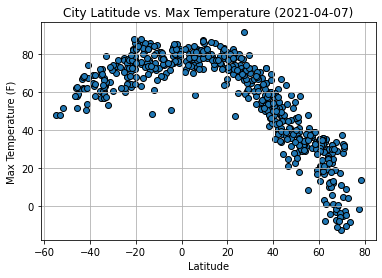

In [257]:
from datetime import date

#operating under the assumption that we are supposed to be trying to match the ones that were here originally

#get date at time of running
today = date.today()



#create scatter plot trying to match the example as best as I can. Scatter plot with Latitude as the x and max temp as the y. 
#the points are circles and their edges are black. 

fig, ax = plt.subplots()
ax.scatter(weather_data_df['Lat'], weather_data_df['Max Temp'], marker = 'o', edgecolor = 'black')


#put the grid on it to match the original
ax.grid()

#add title and labels for x and y 
ax.set(title = "City Latitude vs. Max Temperature (" + str(today) + ")")
ax.set_xlabel("Latitude")
ax.set_ylabel("Max Temperature (F)")

#show 
plt.show()

#### Latitude vs. Humidity Plot

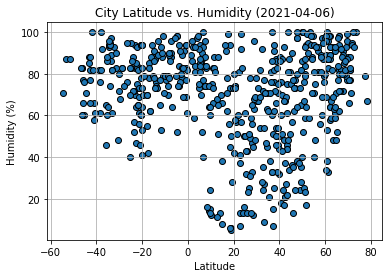

In [251]:

#operating under the assumption that we are supposed to be trying to match the ones that were here originally
#create scatter plot trying to match the example as best as I can. Scatter plot with Latitude as the x and humidity as the y. 
#the points are circles and their edges are black. 


fig, ax = plt.subplots()
ax.scatter(weather_data_df['Lat'], weather_data_df['Humidity'], marker = 'o', edgecolor = 'black')


#put the grid on it to match the original
ax.grid() 

#add title and labels for x and y 

ax.set(title = "City Latitude vs. Humidity (" + str(today) + ")" )
ax.set_xlabel("Latitude")
ax.set_ylabel("Humidity (%)")


#Show
plt.show()

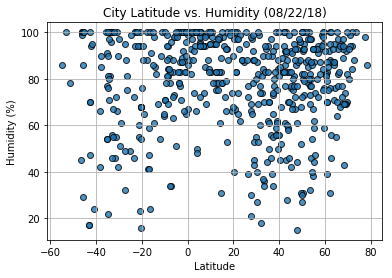

#### Latitude vs. Cloudiness Plot

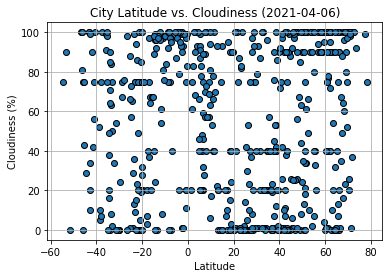

In [248]:

#operating under the assumption that we are supposed to be trying to match the ones that were here originally# x & y coordinates 

#create scatter plot trying to match the example as best as I can. Scatter plot with Latitude as the x and cloudiness as the y. 
#the points are circles and their edges are black. 
fig, ax = plt.subplots()
ax.scatter(weather_data_df['Lat'], weather_data_df['Cloudiness'], marker = 'o', edgecolor = 'black')

#put the grid on it to match the original
ax.grid() 


#add title and labels for x and y 
ax.set(title = "City Latitude vs. Cloudiness (" + str(today) + ")")
ax.set_xlabel("Latitude")
ax.set_ylabel("Cloudiness (%)")

# show
plt.show()

#### Latitude vs. Wind Speed Plot

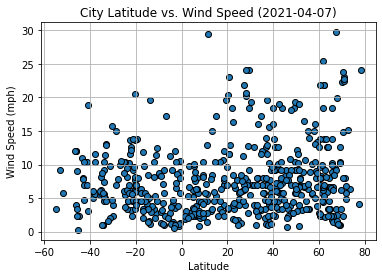

In [258]:
#operating under the assumption that we are supposed to be trying to match the ones that were here originally# x & y coordinates 

#create scatter plot trying to match the example as best as I can. Scatter plot with Latitude as the x and Wind Speed as the y. 
#the points are circles and their edges are black. 
fig, ax = plt.subplots()
ax.scatter(weather_data_df['Lat'], weather_data_df['Wind Speed'], marker = 'o', edgecolor = 'black')
#put on grid
ax.grid()
                                                   
 #add title and labels for x and y 
                                                  
ax.set(title = "City Latitude vs. Wind Speed (" + str(today) + ")")
ax.set_xlabel("Latitude")
ax.set_ylabel("Wind Speed (mph)")





# Display the graph
plt.show()

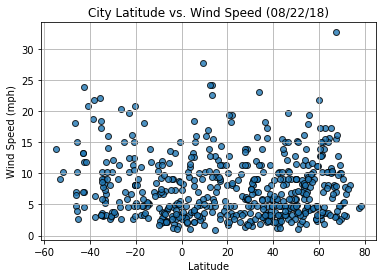

### Use the Seaborn library to re-create 2-4 of the above plots. 
* Use the same data just make a different plot.
* Note the differences in amount of code required to generate a similar plot.

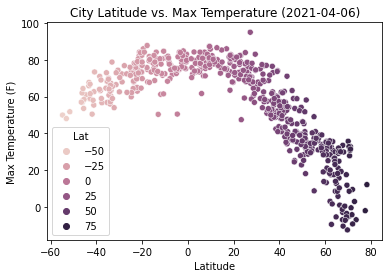

In [252]:
#seaborn scatterplot with x being the latitude and y being the max temp, data pulling from weather_data_df and hue is the latitude
sns.scatterplot(x='Lat' , y='Max Temp', data = weather_data_df, hue='Lat')
#set up title and x and y label
plt.title('City Latitude vs. Max Temperature (' + str(today) + ')')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
#show
plt.show()

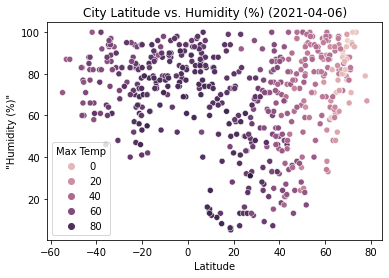

In [253]:
#seaborn scatterplot with x being the latitude and y being the humidity, data pulling from weather_dict and hue is the latitude

sns.scatterplot(x='Lat' , y='Humidity', data = weather_data_df, hue= 'Lat')

#add title and x and y labels
plt.title('City Latitude vs. Humidity (%) (' + str(today) + ')')
plt.xlabel('Latitude')
plt.ylabel('"Humidity (%)"')
#show
plt.show()

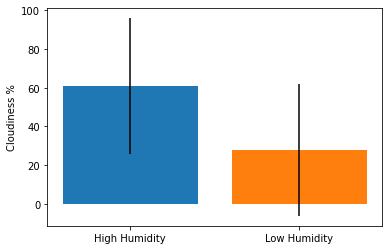

### As a Data-Scientist:
In addition to generating data, munging data and plotting data you will also be responsible for *interpreting* data. 
* Provide a written description of three observable trends based on the data.

In [ ]:
#Latitude and Cloudiness looks all over the map with no trends. 
#Zero latitude has highest temp and they decrease as latitudes move away from zero
# it is more humid at zero latitude and decreases as latitudes move away from zero

### OPTIONAL Homework Problem: 
* Use a **different** api endpoint such as `Hourly Forecast 4 days` to get data. 
* Other weather api endpoints are documented [here](https://openweathermap.org/api). 
* You will have to change the URL parameters to get the data you want. 
* Get the data into a data structure of your choice. (Pandas, dicts, lists etc...)
* Use the plotting library of your choice to make 1-4 plots of your choice. 